In [14]:
import os
os.listdir('./data')

['01_customer_demo.txt',
 '02_shopping_tran.txt',
 '03_non_shopping_tran.txt',
 '04_shopping_category.txt']

## Import datasets

In [15]:
import pandas as pd

customer_demo = pd.read_csv('data/01_customer_demo.txt')
shop_tran = pd.read_csv('data/02_shopping_tran.txt')
nonshop_tran = pd.read_csv('data/03_non_shopping_tran.txt')
shopping_cat = pd.read_csv('data/04_shopping_category.txt')

print(customer_demo.shape,shop_tran.shape,nonshop_tran.shape,
     shopping_cat.shape)

customer_demo.columns = customer_demo.columns.str.lower()
shop_tran.columns = shop_tran.columns.str.lower()
nonshop_tran.columns = nonshop_tran.columns.str.lower()
shopping_cat.columns = shopping_cat.columns.str.lower()

(20000, 4) (3641082, 9) (178659, 5) (3788, 5)


### shape of datasets

dataset | rows | cols
---|---|---
01 | 20000 | 4
02 | 3641082 | 9
03 | 178659 | 5
04 | 3788 | 5

## Customer demo

Columns:
* id(int):
* gender(factor): male = 1, female = 2
* age_prd(factor): age group of customers(20PRD ~ 60PRD)
* hom_pst_no(str): 3 digits before the customer's postcode

In [16]:
customer_demo.head()

,id,gender,age_prd,hom_pst_no
0,1,1,60PRD,52.0
1,2,2,60PRD,80.0
2,3,2,60PRD,620.0
3,4,1,60PRD,120.0
4,5,1,60PRD,NaN


### Gender

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


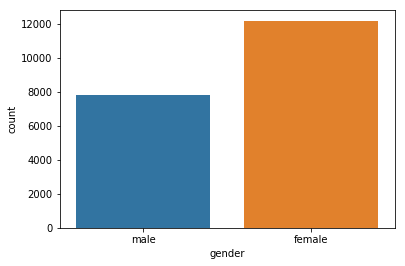

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

aa = customer_demo.copy()
aa.gender.loc[aa.gender == 1] = 'male'
aa.gender.loc[aa.gender == 2] = 'female'

sns.countplot(aa.gender)
plt.show()

### Age_prd

In [18]:
customer_demo.age_prd.unique()

array(['60PRD', '50PRD', '40PRD', '30PRD', '20PRD'], dtype=object)

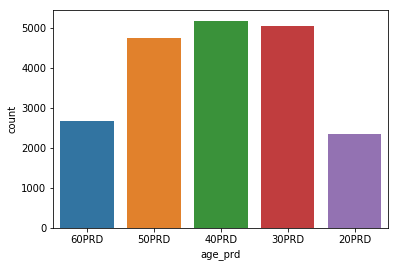

In [19]:
sns.countplot(customer_demo.age_prd)
plt.show()

### Postcode

#### 우편번호 구성
5자리 우편번호는 서울부터 사행식(북서 -> 남동)으로 제주까지 순차적으로 부여, 앞3자리로 시군자치구를 구별

지역 | 앞 두자리| 지역| 앞 두자리
---|---|---|---
서울|01~09|대구|41~43
경기|10~20|울산|44~45
인천|21~23|부산|46~49
강원|24~26|경남|50~53
충북|27~29|전북|54~56
세종|30|전남|57~60
충남|31~33|광주|61~62
대전|34~35|제주|63
경북|36~40

### 국가기초구역번호
구체적인 지역은 [국가기초구역번호](https://ko.wikipedia.org/wiki/%EA%B5%AD%EA%B0%80%EA%B8%B0%EC%B4%88%EA%B5%AC%EC%97%AD%EB%B2%88%ED%98%B8)를 참고.


In [20]:
customer_demo.hom_pst_no.unique()

array([  52.,   80.,  620.,  120.,   nan,   58.,  480.,  470.,   55.,
         72.,   61.,   62.,   36.,   56.,   33.,  460.,   47.,  490.,
        360.,   60.,   90.,   57.,  130.,  100.,  550.,  510.,  340.,
        410.,  140.,  160.,  240.,  400.,  210.,  110.,  370.,   65.,
        440.,   75.,   76.,   20.,   24.,  610.,   16.,  590.,  500.,
         53.,   79.,   44.,    0.,   66.,   70.,   50.,   87.,   68.,
        150.,   63.,   49.,   17.,   18.,  170.,   67.,   37.,  540.,
        600.,  420.,  520.,   13.,   30.,   77.,   74.,   73.,   21.,
         27.,   25.,  280.,   40.,   34.,  250.,  270.,  350.,   83.,
        630.,   12.,   43.,  570.,  380.,   81.,   54.,   51.,  310.,
         88.,   69.,   11.,  300.,  200.,  220.,   10.,   26.,  560.,
         14.,  320.,   48.,   85.,  230.,   82.,  530.,  430.,  390.,
         28.,  580.,   41.,   31.,  260.,   45.,   39.,   22.,   42.,
        180.,  330.,   19.,   78.,   46.,   86.,  290.,   35.,  450.])

In [21]:
# number of nan
sum(customer_demo.hom_pst_no.isnull())

1365

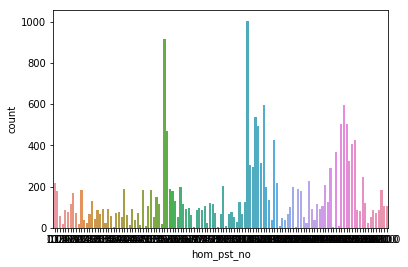

In [22]:
sns.countplot(customer_demo.hom_pst_no)
plt.show()

## 쇼핑업종 상품구매 정보

In [23]:
shop_tran.head()

,id,rct_no,biz_unit,pd_s_c,br_c,de_dt,de_hr,buy_am,buy_ct
0,4008,2108,A01,215,2,20150216,13,59600,2
1,6379,2109,A01,75,29,20150213,11,35000,1
2,6379,2109,A01,149,4,20150115,10,85000,1
3,8002,2110,A01,138,10,20151220,10,25000,1
4,8002,2110,A01,138,10,20151220,10,21000,1


Columns:
* id(int): customer's id
* rct_no(int): 
* biz_unit(factor): 5 categories of the shopping
    * A01: Department store
    * A02: Large supermarket
    * A03: Supermarket
    * A04: Convenience store
    * A05: Drugstore
* pd_s_c(int):
* br_c(int):
* de_dt(date): YYYY/MM/DD
* de_hr(int)
* buy_am(int)
* buy_ct(int)

### Buisness units

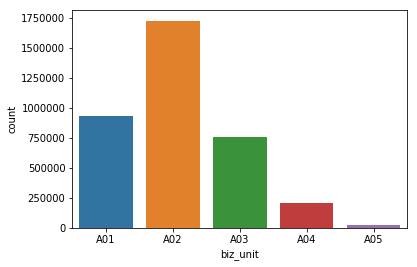

In [24]:
sns.countplot(shop_tran.biz_unit)
plt.show()

### de_dt & de_hr

In [51]:
dt = shop_tran[['id','de_dt']].copy()
dt['de_dt'] = dt.de_dt.astype(str)

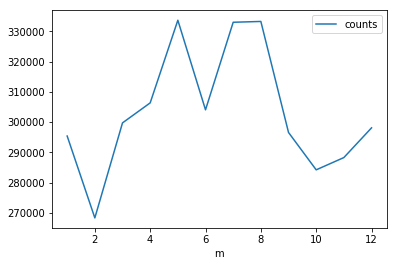

In [52]:
dt['de_dt'] = pd.to_datetime(dt.de_dt)
dt = dt.set_index('de_dt')
dt['m'] = dt.index.month
dt.groupby('m').count().plot(kind='line')
plt.legend(['counts'])
plt.show()

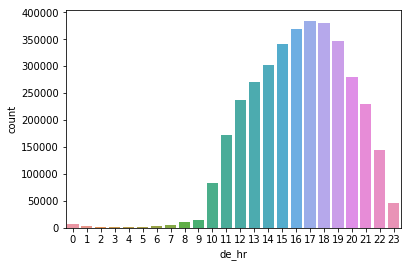

In [58]:
hr = shop_tran['de_hr'].copy()
sns.countplot(hr)
plt.show()

### buy_am & buy_ct

In [59]:
am_ct = shop_tran[['buy_am','buy_ct']].copy()
am_ct.describe()

,buy_am,buy_ct
count,3.641082e+06,3.641082e+06
mean,2.481843e+04,1.249397e+01
std,2.531372e+05,1.043572e+02
min,0.000000e+00,1.000000e+00
25%,2.000000e+03,1.000000e+00
50%,4.480000e+03,1.000000e+00
75%,1.000000e+04,1.000000e+00
max,1.660300e+08,1.005000e+04


In [ ]:
sns.countplot(am_ct.buy_am)
plt.show()